# Lesson 3 Codealong

In [3]:
#General imports
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Part 1. Basic Stats
	
    Methods available include: 
		.min() - Compute minimum value
		.max() - Compute maximum value
		.mean() - Compute mean value
		.median() - Compute median value
        .mode() - Compute mode value(s)
		.count() - Count the number of observations

#### Read in the examples

In [4]:
df = pd.DataFrame(
    {'example1' : [18, 24, 17, 21, 24, 16, 29, 18], 
     'example2' : [75, 87, 49, 68, 75, 84, 98, 92], 
     'example3' : [55, 47, 38, 66, 56, 64, 44, 39] })
df

,example1,example2,example3
0,18,75,55
1,24,87,47
2,17,49,38
3,21,68,66
4,24,75,56
5,16,84,64
6,29,98,44
7,18,92,39


#### Instructor example: Calculate the mean for each column

In [5]:
df.mean()

example1    20.875
example2    78.500
example3    51.125
dtype: float64

Alternatively: for each row

In [6]:
df.mean(axis=1)

0    49.333333
1    52.666667
2    34.666667
3    51.666667
4    51.666667
5    54.666667
6    57.000000
7    49.666667
dtype: float64

#### Students: Calculate median, mode, max, min for example

Note: All answers should match your hand calculations

In [7]:
#maximum
df.max()

example1    29
example2    98
example3    66
dtype: int64

In [8]:
#minimum
df.min()

example1    16
example2    49
example3    38
dtype: int64

In [10]:
#median
df.median()

example1    19.5
example2    79.5
example3    51.0
dtype: float64

In [28]:
#mode
df.mode()

,example1,example2,example3
0,18.0,75.0,38
1,24.0,NaN,39
2,NaN,NaN,44
3,NaN,NaN,47
4,NaN,NaN,55
5,NaN,NaN,56
6,NaN,NaN,64
7,NaN,NaN,66


In [18]:
# key summary stats in one go

df.describe()

,example1,example2,example3
count,8.00000,8.000000,8.000000
mean,20.87500,78.500000,51.125000
std,4.48609,15.445758,10.776131
min,16.00000,49.000000,38.000000
25%,17.75000,73.250000,42.750000
50%,19.50000,79.500000,51.000000
75%,24.00000,88.250000,58.000000
max,29.00000,98.000000,66.000000


In [31]:
# Bonus: calculate summary statistics and all DECILES (hint: see '.describe()' and the 'percentiles' keyword argument.)

df.describe(percentiles=[.1, .3, .4])

,example1,example2,example3
count,8.00000,8.000000,8.000000
mean,20.87500,78.500000,51.125000
std,4.48609,15.445758,10.776131
min,16.00000,49.000000,38.000000
10%,16.70000,62.300000,38.700000
30%,18.00000,75.000000,44.300000
40%,18.00000,75.000000,46.400000
50%,19.50000,79.500000,51.000000
max,29.00000,98.000000,66.000000


## Part 2. Box Plot

#### Instructor: Interquartile range 

In [32]:
print "50% Quartile:"
df.quantile(.50) 

50% Quartile:


example1    19.5
example2    79.5
example3    51.0
Name: 0.5, dtype: float64

In [33]:
print "Median (red line of the box)"
df.median()

Median (red line of the box)


example1    19.5
example2    79.5
example3    51.0
dtype: float64

In [34]:
print"25% (bottom of the box)"
df.quantile(0.25)

25% (bottom of the box)


example1    17.75
example2    73.25
example3    42.75
Name: 0.25, dtype: float64

In [35]:
print"75% (top of the box)"
df.quantile(0.75)

75% (top of the box)


example1    24.00
example2    88.25
example3    58.00
Name: 0.75, dtype: float64

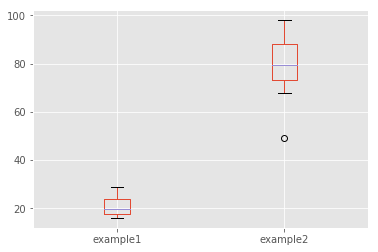

In [40]:
df[['example1', 'example2']].plot(kind='box');

#### Student: Create plots for examples 2 and 3 and check the quartiles

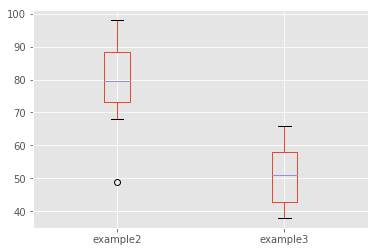

In [41]:
df[['example2', 'example3']].plot(kind='box');

In [42]:
import seaborn as sns

#### What does the cross in example 2 represent?

Answer: 

#### Alternative to Boxplot

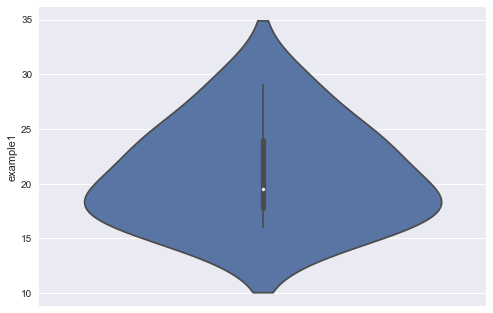

In [43]:
sns.violinplot(y='example1', data=df);

## Part 3. Standard Deviation and Variance

**Variance:** The variance is how much the predictions for a given point vary between different realizations of the model.

**Standard Deviation:** The square root of the variance

<img(src='./images/biasVsVarianceImage.png', style="width: 30%; height: 30%")>

#### In Pandas
	Methods include: 
		.std() - Compute Standard Deviation
		.var() - Compute variance

#### Let's calculate variance by hand first. 
<img(src='./images/samplevarstd.png', style="width: 50%; height: 50%")>

In [44]:
#example1
df["example1"]

0    18
1    24
2    17
3    21
4    24
5    16
6    29
7    18
Name: example1, dtype: int64

In [45]:
mean = df["example1"].mean()
mean

20.875

In [46]:
n= df["example1"].count()
n

8

In [49]:
#find the squared distance from the mean
obs0 = (18 - mean)**2
obs1 = (24 - mean)**2
obs2 = (17 - mean)**2
obs3 = (21 - mean)**2
obs4 = (24 - mean)**2
obs5 = (16 - mean)**2
obs6 = (29 - mean)**2
obs7 = (18 - mean)**2

print obs0, obs1, obs2, obs3, obs4, obs5, obs6, obs7

8.265625 9.765625 15.015625 0.015625 9.765625 23.765625 66.015625 8.265625


In [50]:
#sum each observation's squared distance from the mean 
numerator = obs0 + obs1 + obs2 + obs3 + obs4 + obs5 + obs6 +obs7
numerator

140.875

In [51]:
denominator = n - 1
denominator

7

In [52]:
variance = numerator/denominator
variance

20.125

In [53]:
def std_by_loop(series):
    mean = series.mean()
    n_minus_1 = series.count() - 1
    std = 0
    for value in series.tolist():
        std += (value - mean) ** 2
    return (std / float(n_minus_1)) ** .5

In [54]:
def std_vectorized(series): 
    sum_of_difference_from_mean = series.subtract(series.mean()).pow(2).sum() #vectorized!
    return np.sqrt(sum_of_difference_from_mean / (series.count()-1))

In [55]:
print std_by_loop(df['example1'])

4.48608961123


In [56]:
print(std_vectorized(df.example1))

4.48608961123


In [57]:
# in pandas
print "Variance"
df["example1"].var()

Variance


20.125

#### Students: Calculate the standard deviation by hand for each sample

Recall that the standard deviation is the square root of the variance. 

In [59]:
#find the variance for each dataset
print df["example2"].var()
print df["example3"].var()

238.571428571
116.125


In [60]:
#calculate standard deviation by hand
print df["example2"].var()
print df["example3"].var()

238.571428571
116.125


In [64]:
#now do it with pandas!

print std_by_loop(df["example2"])
print std_by_loop(df["example3"])

15.4457576237
10.7761310311


NameError: name 'std_by_loopdf' is not defined

#### Short Cut!

In [69]:
df.describe()

,example1,example2,example3
count,8.00000,8.000000,8.000000
mean,20.87500,78.500000,51.125000
std,4.48609,15.445758,10.776131
min,16.00000,49.000000,38.000000
25%,17.75000,73.250000,42.750000
50%,19.50000,79.500000,51.000000
75%,24.00000,88.250000,58.000000
max,29.00000,98.000000,66.000000


#### Student: Check understanding 
Which value in the above table is the median? 

Answer: 

### Part 4: Correlation

In [67]:
df.corr()

,example1,example2,example3
example1,1.000000,0.477283,-0.123745
example2,0.477283,1.000000,-0.057076
example3,-0.123745,-0.057076,1.000000


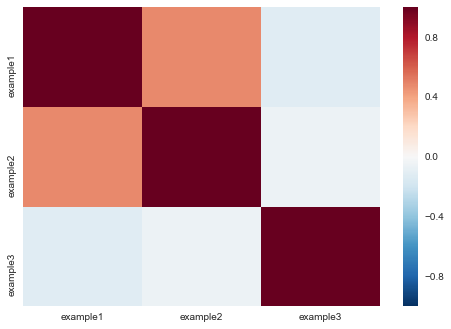

In [70]:
sns.heatmap(df.corr())